In [1]:
import pandas as pd

raw_data = pd.read_csv("/Users/annaevseeva/Downloads/MARL Dynare/GarciaCicco_et_al_2010.csv")
raw_data.head()

,c,k,a,h,d,y,invest,tb,mu_c,tb_y,g_y,g_c,g_invest,g,r,mu,nu,s
0,-1.987673,-1.249740,-0.040487,-1.753699,-5.685612,-1.613780,-3.329582,0.005349,5.668741,0.025451,-0.051030,-0.082082,-0.092227,0.017909,0.126598,0.028862,-0.225895,-3.844618
1,-1.964402,-1.251451,-0.017123,-1.744606,-6.194544,-1.599231,-3.290028,0.003573,5.607068,0.017018,0.032458,0.041180,0.057464,0.006089,0.120539,0.036689,-0.214992,-3.854504
2,-1.964916,-1.256953,-0.026345,-1.748256,-6.321024,-1.605071,-3.249678,0.000643,5.568335,0.003187,0.000249,0.005575,0.046439,0.015518,0.102326,0.026765,-0.238854,-3.846384
3,-2.053565,-1.287430,-0.070099,-1.795374,-7.129203,-1.680459,-3.417693,0.005125,5.781450,0.024584,-0.059870,-0.073131,-0.152497,0.018704,0.136944,0.067581,-0.242619,-3.868064
4,-2.044143,-1.304291,-0.066796,-1.812876,-7.064681,-1.708464,-3.452498,-0.000956,5.974052,-0.004069,-0.009300,0.028126,-0.016101,0.004508,0.120998,0.066170,0.080547,-3.862425


In [2]:
print(raw_data.columns.to_list())

['c', 'k', 'a', 'h', 'd', 'y', 'invest', 'tb', 'mu_c', 'tb_y', 'g_y', 'g_c', 'g_invest', 'g', 'r', 'mu', 'nu', 's']


In [3]:
mapping = {
    "c": "Consumption",
    "k": "Capital",
    "a": "Total Factor Productivity",
    "h": "Hours Worked",
    "d": "Debt",
    "y": "Output",
    "invest": "Investment",
    "tb": "Trade Balance",
    "mu_c": "Marginal Utility of Consumption",
    "tb_y": "Trade Balance to Output Ratio",
    "g_y": "Output Growth Rate",
    "g_c": "Consumption Growth Rate",
    "g_invest": "Investment Growth Rate",
    "g": "Technology Growth Rate",
    "r": "Interest Rate",
    "mu": "Country Premium Shock",
    "nu": "Preference Shock",
    "s": "Exogenous Spending"  # Присутствует, если RBC == 0
}


raw_data = raw_data.rename(columns=mapping)

# Вывод обновленного датафрейма
print(raw_data.head())
idx = raw_data.columns.get_loc('Output')
print(idx)

   Consumption   Capital  Total Factor Productivity  Hours Worked      Debt  \
0    -1.987673 -1.249740                  -0.040487     -1.753699 -5.685612   
1    -1.964402 -1.251451                  -0.017123     -1.744606 -6.194544   
2    -1.964916 -1.256953                  -0.026345     -1.748256 -6.321024   
3    -2.053565 -1.287430                  -0.070099     -1.795374 -7.129203   
4    -2.044143 -1.304291                  -0.066796     -1.812876 -7.064681   

     Output  Investment  Trade Balance  Marginal Utility of Consumption  \
0 -1.613780   -3.329582       0.005349                         5.668741   
1 -1.599231   -3.290028       0.003573                         5.607068   
2 -1.605071   -3.249678       0.000643                         5.568335   
3 -1.680459   -3.417693       0.005125                         5.781450   
4 -1.708464   -3.452498      -0.000956                         5.974052   

   Trade Balance to Output Ratio  Output Growth Rate  Consumption Growth R

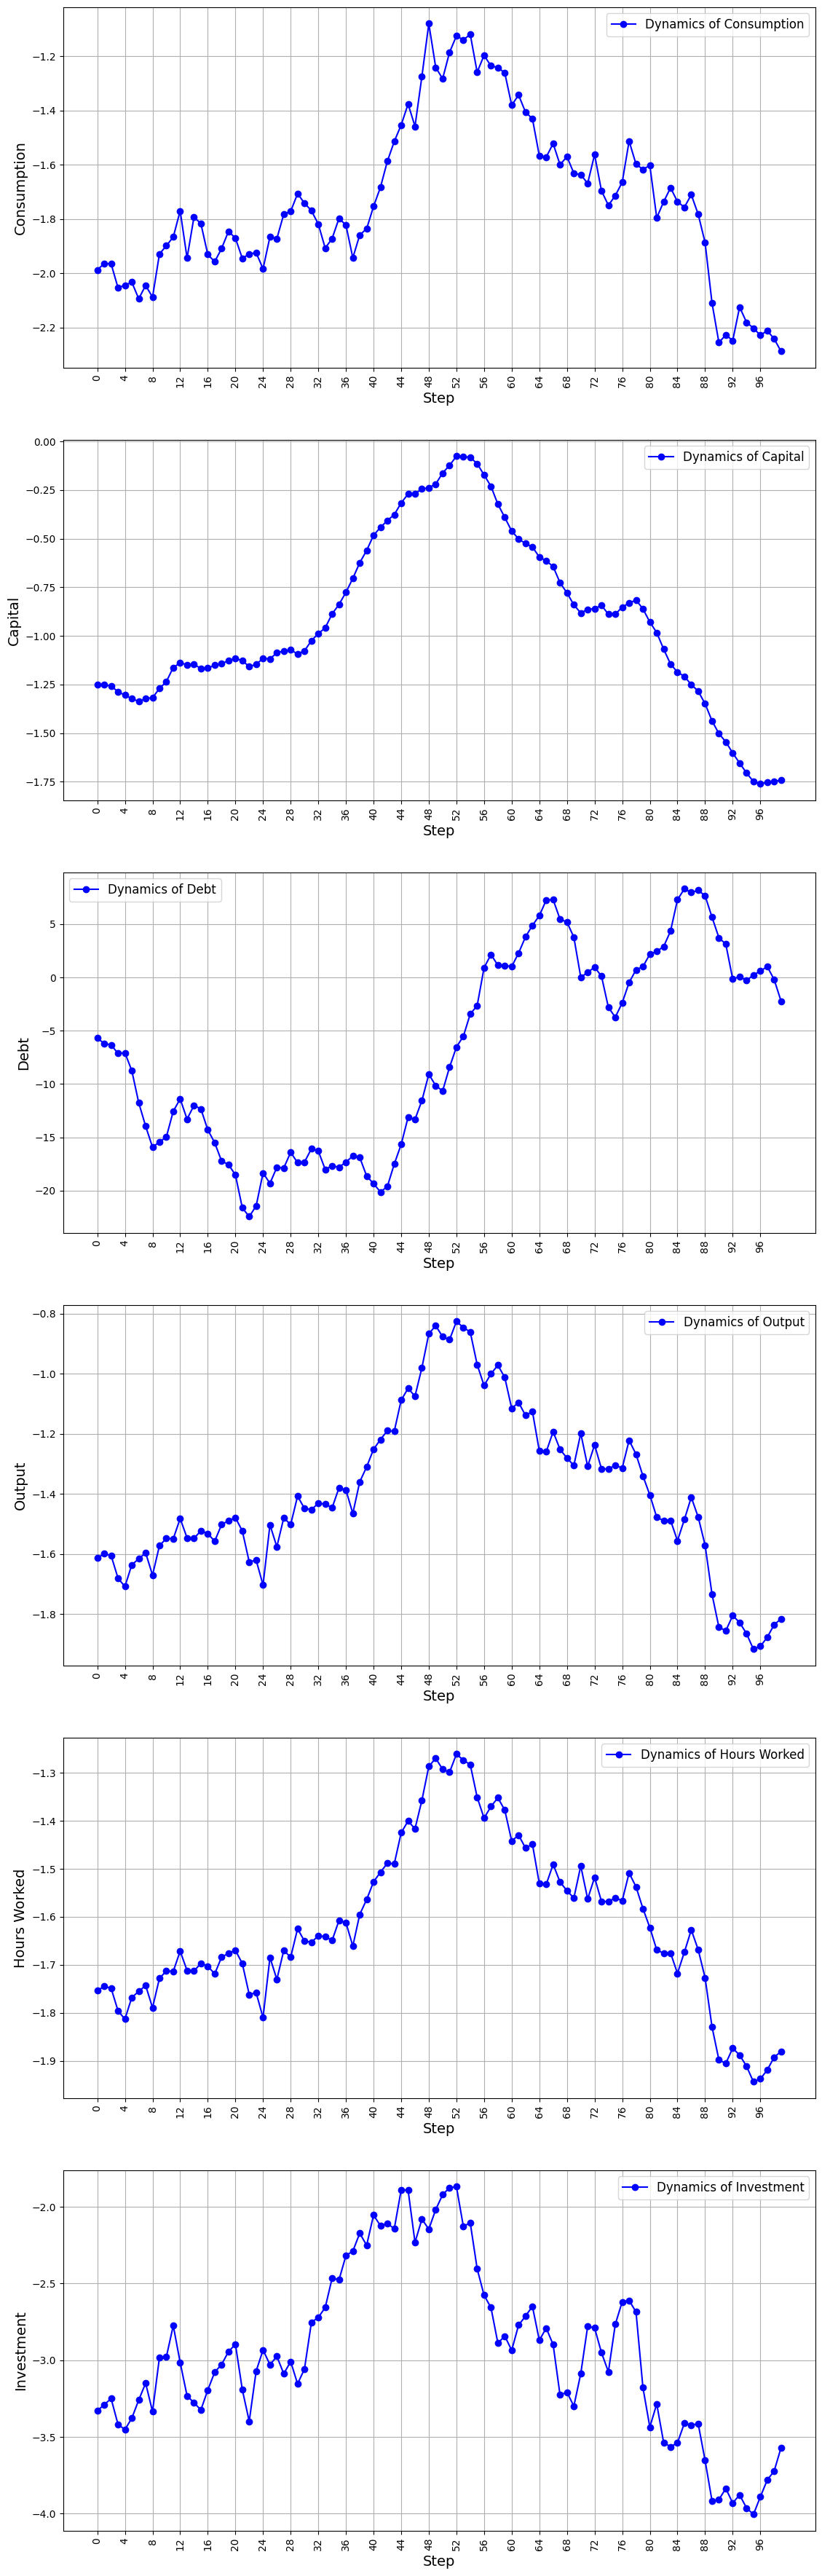

In [5]:
import matplotlib.pyplot as plt
import numpy as np

columns = ["Consumption", "Capital", "Debt", "Output", "Hours Worked", "Investment"]
# columns = ["y", "c", "k", "invest"]


fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(13.33, 7.5 * len(columns)))

for idx, column in enumerate(columns):
    
    column_values = raw_data[column].to_numpy()
    
    steps = np.arange(len(column_values))
    
    ax = axes[idx]
    
    ax.plot(steps, column_values, marker='o', color='blue', label=f"Dynamics of {column}")
    
    
    ax.legend(fontsize=12)
    ax.set_xlabel("Step", fontsize=14)
    ax.set_ylabel(f"{column}", fontsize=14)
    ax.set_xticks(steps[::4])
    # ax.set_yticks(np.arange(np.min(column_values), np.max(column_values)))
    ax.set_xticklabels(ax.get_xticks(), rotation=90)
    ax.grid(True)